In [2]:
import numpy as np
import pandas as pd

from pandas.io import gbq

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", palette="Set3")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
tags = pd.read_csv('all_levels_playlist_tags_usage.csv', sep='\t')

In [4]:
tags.head()

,playlist_id,Ensemble/Ensemble Configuration/Mariachi Band,Intensity/Low/Low Intensity,Playlist/Time/Month/May,Playlist/Theme/Scary,Playlist/Theme/One Hit Wonder,Artist/Ensemble/Band,Playlist/Time/Century/1400s,Emotion/Attitude/Majestic,Genre/Traditional/Irish,...,Instrument/Wind,Emotion/Negative/Fearful,Emotion/Positive/Blissful,Playlist/Mood/Feeling Good,Playlist/Time/Holiday/New Year,Genre/Pop,Playlist/Activity/Working,Genre/R&B/Soul,Genre/Rock,Playlist/Location/Galaxy
0,3fGdxCiXu9ByRZUA7QeqOD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6IJNg37ejhBbAwfNqe8yme,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0XKz5dOHLZQSHWgkn2jL7Q,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0ejM8M3JPmlMK7n5cbg8zl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7iMyUkmPe7epyb8J1mqT9y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
tags.shape

(7603, 388)

In [6]:
len(tags.playlist_id.unique())

1441

In [7]:
by_id = tags.groupby(by='playlist_id')

df_clust_id = pd.DataFrame(columns=tags.columns[1:])

for col in tags.columns[1:]:
    df_clust_id[col] = by_id[col].max()

In [8]:
df = df_clust_id.reset_index()
df.head()

,playlist_id,Ensemble/Ensemble Configuration/Mariachi Band,Intensity/Low/Low Intensity,Playlist/Time/Month/May,Playlist/Theme/Scary,Playlist/Theme/One Hit Wonder,Artist/Ensemble/Band,Playlist/Time/Century/1400s,Emotion/Attitude/Majestic,Genre/Traditional/Irish,...,Instrument/Wind,Emotion/Negative/Fearful,Emotion/Positive/Blissful,Playlist/Mood/Feeling Good,Playlist/Time/Holiday/New Year,Genre/Pop,Playlist/Activity/Working,Genre/R&B/Soul,Genre/Rock,Playlist/Location/Galaxy
0,00Ot5pBIr1CuAlAJUivoOK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00e2vXzWaSmxJ1Fga6l2ug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,00ovokuQiZ1iBM5hxFqyxP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00xkZo0UVb5tsXPj2I9DZz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,014Mr2IJhIfZFu6NLYl6nO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
df.shape

(1441, 388)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ensemble/Ensemble Configuration/Mariachi Band,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Intensity/Low/Low Intensity,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Playlist/Time/Month/May,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Playlist/Theme/Scary,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Playlist/Theme/One Hit Wonder,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Artist/Ensemble/Band,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Playlist/Time/Century/1400s,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Emotion/Attitude/Majestic,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Genre/Traditional/Irish,1441.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Contents/New Music/Frontline,1441.0,0.000694,0.026343,0.0,0.0,0.0,0.0,1.0


## Playlist Tag Groups

The idea is to (ideally) have at least one tag from each group assigned to each playlist

* ### Genre


* ### Application:
    * #### Mood
    
    * #### Activity
    
    * #### Theme
    
    * #### Energy:
        * #### Intensity
        * #### Emotion
        
    * #### Time:
        * #### Time of Day
        * #### Day of the Week
        * #### Seasons
        * #### Years
        * #### Decades
        * #### Centuries
    

* ### Tempo:
    * #### Slow
    * #### Medium	
    * #### Fast
    
    
* ### Arrangement:
    * #### A Capella
    * #### Instrumental
    * #### Voice & Music
    
    
* ### Performance:
    * #### Instrument
    * #### Ensemble	
    * #### Voice
    
    
    
* ### Popularity:
    * #### Charts/Hits
    * #### Deep Cuts / B-Sides
    * #### Greatest Hits / Best Of
    * #### Rising / New Music
    
    

* ### Contents:
    * #### Artist Specific
    * #### New Music / Frontline	
    * #### Catalogue
    * #### Mixed (Catalogue and Frontline)

    
    
* ### Artist/Ensemble:
    * #### Solo
    * #### Single Artist
    * #### Multiple Artist	
    * #### Band


### Estimating current tag distributions

Creating the dictionary of playlist tag groups and their ids

In [20]:
tag_group_dict = {
    'genre':['e6576040-ba5a-4f51-b547-3d1ec7005afd','9d557d09-c923-410c-b2c9-3239d073d703','6dc2a882-8bf6-423e-a9e8-07615ac91154','195e1e65-82e9-4a49-96de-fca22301027e','da8a990f-9398-483d-8284-80d01c4ef634','f814d27a-2e75-48a7-b2aa-731e6e0ac95a','c9827769-5b34-4403-8921-eb103f322fbf','a6e9ef88-0f2e-4624-9275-34fdcfaea7b2','e31d4b6d-eadb-4ddd-a97f-37137642f571','fe067718-5430-4128-ab4f-7d571e2b4de9','2fa3f860-6f34-4464-81ad-7cc62a0c8696','3ffa3c14-6b46-4295-9618-77b1de08c9b6','fe776e3d-dbcb-424e-b70d-9487131080e6','5ae853d5-88f8-44d3-9d00-f002dcc44029','325348e8-17d8-4c15-9c4d-75f5fdafdc49','c38b1c5d-43c2-4381-b103-1558a081c5d9'],
    'application_mood':['7bc01dab-0710-4b0b-99e7-d3ab6f377995','ad312d5e-b048-48b2-a863-a0625e4471f3','ae1e5ecd-ef60-4e2b-9a5b-4b8589aa806c','e5e4815d-40f2-40cf-8457-50f1da3e42f5','fc7eaf4e-cc51-4c2e-aa0c-31a472436381','3dec689f-737a-4a99-8cfb-5e2d9ab3d7b2','cf96216b-70d0-4563-bc5f-2de288e35972','5ae76cf7-35c2-44f4-abfb-5af2508430b5','2c5f62b7-383b-479c-96b8-f93ef42c6b2c','b879077a-d94e-4911-b7c8-85edbc1d8aac','8ee6194c-d53a-450f-b32a-eac8d48216e4','f0ad0faf-069e-407f-9fd3-0d1cf4809b90','869edfab-7236-4cc3-8f39-4d0c549412d2','0b7cc25a-2cd5-4c1f-846d-3a6f8d865e34','ac74433c-b25f-4a80-ae24-f7d1544d2f32','c7b7db44-de02-4fd5-a020-21650b009190','a2b3818e-b536-4a1e-b1eb-15be04f4c2d1','e35613af-7833-455a-b6b6-9afeef9d95aa','bbdcf68a-a88b-4be7-91f9-da4a1856753d','a21d9b80-b19e-480a-a714-25e2f3ad3bb8','4d10a80e-1221-4679-9ac8-7fd55c9c7da3','480fa9ae-670c-4044-ae56-b6c2f2c2da0a','77889d6d-8058-4c76-a4af-3bf5c586c750','1e078bfd-480e-4d44-93a1-ad5d7a3a48be','286340ad-1b0e-414d-b8ba-4755bbbd31fc','7efef582-eabd-4bea-9bd9-d615a80f7aec','4592900c-3bef-4f5a-b78d-766ff4b9725d'],
    'application_activity':['8c9aee2d-9c84-42e6-8f40-aaa1c6d3a3cf','b2f09caf-4629-4bda-9153-03a067006c3f','ef0fce48-7185-4783-97ff-6bacc4ca5d51','1df6d354-688f-45a6-b3be-2ccb62a76ce0','aa9bf721-64f1-47b2-87ff-e47f480d8889','8fb8ad4e-f124-4ce7-9c28-1cfbf328d81b','57924078-3ef2-4611-abaf-9f9e9757f30b','9d394a18-1946-4b33-8a44-65fab2a5f42c','4845c08d-550c-4c8f-8acc-839ea80c8106','bedfd360-75a1-48f4-a043-95af261d7b7b','b93419c0-8b40-4106-bebb-fda732667479','6d716484-86ed-47c2-ae3d-80c85e22b54a','8bf3cad9-d526-438b-b286-c1796943e7ec','d2cc9a22-907d-4231-a0ea-e80fe515583d','3876b94c-446a-4b52-8e30-c45748e74729','c775d122-4050-4cda-b3dd-413df2136876','fe22b1ad-e8fc-4156-8cae-ec9e6ed098de','3d254750-444a-4e0d-a1ec-89afb7bc7e35','a189596b-d4b3-4b83-8466-8496349eb35a'],
    'application_theme':['b0438e86-1908-420c-a265-f5be4c4f60a2','ef591634-dacf-48c7-b447-873cc3ddb365','04d06dab-fdb0-4943-81ba-0efe10501ea6','ae8e437e-93cf-46a8-8829-97a75be688fd','e58155ec-e01a-4686-a305-0a6fe0af9df8','83680997-9efb-46d1-bca6-94f1666483d6','12d9f73c-14c5-44de-9f26-37133ab44430','8e9281d6-208d-4930-808f-9c7e27be9c24','d26585f3-51c0-4a2f-a7ed-6a6a67e942d7','58df6c95-c037-483a-86f9-d80f8449079e','c699476a-6997-44c9-8d57-fc53d4d2c406','6c151504-29ec-4284-9bc5-17237367eedd','1a61eec8-79fd-4ecf-9c95-75061d67dc05','598d9a03-2222-4300-9cdc-b034ef5cb12a'],
    'time':['4bc46368-4b1c-4476-afc7-6fdc9d656082','0d4fa530-244a-4bb5-8aa5-06f39d3c1dab','1a91740d-8daf-49c2-aa1e-d3983e3e3183','a0308d61-8fbc-49be-a81f-911386859382','1eb92685-de75-4ec5-84f8-5aadab43726f','40fe98dd-44b9-4898-8e04-2b522f09d8de','72db20b4-c1af-4a74-a817-0640ff13f258','b27877a1-803c-4080-986f-81b21ba581c2','bb820d23-5607-4c87-bc85-a160a12d6cb7','e2ef4090-5051-4668-b88d-24c327f2fc04','cb1fc0f4-2242-41dd-a4be-9e7ff402726d','2d587d1c-5e28-40d7-8fd1-39d4679517f4','b293f22b-68c3-4aae-b946-31f92e7bdcda','3439ec13-0454-4d49-b3ba-923b30b5f1b0','6af5cff5-bd87-4f47-ab9c-5145c5a25e1b','2f8614d5-9578-4826-8605-32cb564df759','de5910f3-ca49-4d8c-a44a-180fd1a2ba63','7370dea5-263d-465f-a661-b85753c89faa','1b64b93c-1da9-4d28-9cdf-191ef2ff3b7a','034843c2-508d-484f-84d5-60434f4f8b8e','4bb35fba-d48a-42ed-bd77-0460e345c425','47c881f8-a64c-469b-9d9b-aa3c26d98161','7f1816a2-8005-4130-8329-5b8dec8db4a4','661dfa2c-2b99-429a-9114-e3033c37cd39','3d6fb8b7-bcd8-4910-a630-8cf88f1c6bbf','f496d202-10c3-4c97-9bc4-5d106ce660dc','7887735f-708d-455d-b643-e80aa73b5442','7463db5a-6c01-48d6-935c-151cbc8b0932','f011d90b-5bf0-4160-b988-a497d8148331','ba153f03-d919-4530-a047-df099cd7f52f','3a9af649-2c28-4a1e-8ab0-3a7e2aef334d','5ad2a8ed-8dde-48fc-b497-07dc13b5be89','5b5caef7-caa9-40e7-b252-ea48790bf88a','9dccb91f-2147-4f33-a5e1-c352863b4b3d','c3de98f1-f82d-4c9f-9d93-e4c1f84a43db','9a2280e6-abd2-43da-9180-b7970e2d9a83','3e54f151-1c6a-4b30-87e5-8773c3c97956','a04a48f4-1b2c-460d-940a-764031af07af','62b4361e-3d89-46ba-a1e1-8147933948fe','5bef664b-c15e-4f22-89c8-ac1677b863df','fd10eb0e-cc10-40d6-bedb-462919a64f37','200a7d95-08e6-4d03-ab90-364c599a5593','81c01ef1-669e-463f-a917-31782e5fc985','d851e4b4-9b89-49b7-b676-80b669251342','207977a7-d653-498d-89b3-e0c3721728a4','870991ad-d08f-4cf3-8bc8-e0ab03989145','f6c72e40-a801-4380-a94e-8294f706fe51','eeace084-1de5-4cad-81b7-ad138279cba0','91ce3f27-03a7-4314-a53b-75a5568b6bcc','19f98dce-751e-4a47-a8e9-81ea41c04ae8','1bb61928-bc22-41ec-be81-de49f02d1db9','7701c47f-8827-4a93-a9ca-5d0c39e973b2','5996380a-3a38-4fef-aebe-f5b77e48c314','3a257e13-bf56-434f-af9d-c2ed1bfdefb9','9cb184d1-adb2-4da7-ae7c-e7a4c8d84084','26f9a17a-3268-4bf5-a8e6-526c9cc7dee3','cb40e151-d928-4994-8751-094601a81dbe','075c709f-25c2-47f4-839a-a073574ac4d7','8b110a00-6770-464a-a730-557641727c65','f67bc32a-736a-4e2a-9bc5-c904dc587dd6','f6d5748b-3010-4dfa-b3f1-be716ab9e796','43370fc4-7052-42bc-9d6d-cdafc73b8327','b3ed8e5b-3172-4bff-9969-bc805f434f9e','3b5def46-6158-449b-ac2c-fca3782c2006','55b79937-5743-45d3-bf9e-d985065dc0b9'],
    'energy_intensity':['6a257253-539a-40f8-b7e6-4244f414428c','17f84b01-f701-40e6-8363-d365a009fb62','787fee32-5747-41b1-87b3-aa319bb66478'],
    'energy_emotion':['c87d55e8-ef67-4857-aaf6-ebd33665e675','142a3cd9-007c-4029-b07d-f8fe076916f7','2392a959-c77a-4832-b2e5-8616d58d8602','1b75c332-c638-43a9-a8c8-b86d7ac08d8f','5f7a98cd-6b9b-4481-83e4-a3e5a5272ff8','c11b4ff8-c8f1-4b07-bb0e-63110bca44c9','41d64f6e-5214-47cc-a2f6-81e02f59485a','a778d762-50ba-4144-b6b1-b12589347cf6','8d5907f4-d38c-4ac2-b0e1-06ddd6a6088a','8c642c9e-44ec-4557-9b9c-67726cc94ae4','1dd9fb0c-7d7b-41f0-b6a4-f95e5f1656a5','07744b0b-6c6b-40f7-ac35-d13eaee0b054','dade5c27-4687-4721-94b0-55116306b792','d6eaf559-7c82-48d4-8eea-e6368f755c72','dce29583-3450-4c67-8df4-2ce857658307','5eb43531-159c-44d2-bd75-08a8fa80f2c4','bad29696-e4bf-4b51-b2b9-11298c11d359','59db0a66-7a32-4970-96cf-a1deaa73dc2c','735a81a7-0514-4fd5-9d0a-6bb766015c08','3a305083-4df7-4780-a73f-6943ad894a08','85a4e4c5-879a-4f89-9b7f-7439b4d41932','fba6c7c6-edfc-466f-86d2-1bdfbc401050','d0e0d85b-6f71-435b-ba9c-101b0f59339e','4848d188-6ef4-4bb3-a385-74633ee6ae77','77822969-740e-4f56-9ea0-09de404dc071','fbc5ed78-243f-46df-bae7-577492d554dc','64f3dd77-922e-4461-927f-d11e9078c5ad','1e6e63c6-15dd-4767-9f0e-84d51a17091b','89a8d7be-46bb-49e6-88e8-21c866598f05','6348bce7-e3fb-4e89-8667-adc7ab8103db','5c55f7dd-506b-4310-9cfc-fd9242aa884e','61987cf6-d75a-4f56-a643-84aa4dd4f1f3','1d120cf1-e28a-4c97-b867-117a4662f128','9741eee3-4efe-4f60-b14e-2bc932c304a2'],
    'tempo':['81d65be3-1438-43fb-9ca1-82414d1e9930','76c2f4a0-9e78-4c48-b9bf-4864e9957c3a','925b6056-30e6-4554-9e69-51835f2170e0'],
    'arrangement':['343f284f-06d7-47b7-8b9b-076c4511e998','ad19f314-c5c6-4de8-bba5-4456577b4300','df112352-99b1-4cda-b46b-6b68d97ed796'],
    'performance':['dffec3b6-6cbd-45c0-b928-982cecec3b80','23376d10-127f-4344-8ef3-931f9dec6073','a239ac45-c254-4bdd-8f0b-c226540374ef','64b277d8-6f18-40c3-9d02-7d966012d0cb','5cb95c9c-218c-4f58-afc3-31761db79513','b6f4276a-75df-4904-a61e-76b61dd0e3e0','7a8e0421-9fa2-4b4b-a9d4-e219df4a4ca5','5046064b-b6f4-416e-b106-1e40270b5f98','327038c7-436f-4795-b93a-a70f23906e47','ada66447-1442-4b2d-afca-4dfc1b66ac32','84f755f6-4664-414c-8eec-e706fa035511','92a26e27-622b-47f6-89a5-09c67c0a402e','ecfb6720-8466-4fc1-a93e-a06f80990f8a','fac24212-3fd7-4bbe-81c1-0c0560b29a2b','e163d399-695f-4c33-8fff-f0a83771f8c9','614a1d4c-3d57-44db-b58e-35c9dd4baf3d','4966b1fa-d7a7-4313-ae1a-29c878a17a43','28c26d19-a654-47ee-b1ca-48b046ef6a0e','52c7410b-ee65-47b6-aa96-ccecea65d597','3d0e1ae7-2dd4-4219-ad2a-ec9fc52810f2','623285f8-9899-4f45-9862-e4892b48c2aa','b9bf9935-e5f4-4cfa-a343-df7fd962d840','550d58f0-c494-4d82-8c94-ab9aa671ba64','24084cdf-1b4f-4e45-99a0-5242ec9a9739','000cc4ca-6de4-4d7e-82a8-95093105e421','351913ae-1a41-4cb6-9cea-1f42c88daba3','c3aa328a-3d05-4785-a4ca-5e49492c680a','ddb813d8-3410-43ce-8e1a-f2c9b047ff49','37bb3e30-63f2-491d-9fdf-50214e700985','9c79b703-bb9c-4cc8-9b64-cd3b1512f6ef','6df35aeb-4c6f-448e-8d14-1967aa24a098','e071c631-a8b9-4851-82d9-9e6c1f146572','307b7caa-ef37-4647-be18-5f4409065046','b1eb3b83-adb1-4cd0-93fd-c1fe815ffed4','4e0c2807-f4e8-4c4b-be84-9aaba351d07c','1ec4d2a1-efe9-4394-9802-24627dc4e0d9','90e2e1af-4d28-405b-b524-59eba430094c','59b805ef-7097-43c1-b9fc-27490e802505','bdeb3512-f0d2-4d96-b24c-7d71a8654c05','6d36b370-263a-49e2-a87a-b991e07d3283','1461d992-66fe-4af0-aeeb-d611d324faa2','c4783294-386f-40da-af3a-16e8edaa0396','8c0f8abf-174c-444e-b6d6-6555c19aa0a6'],
    'popularity':['99025420-177d-4211-a9ee-c917dbee61dd','6c4ef1c1-b42c-43d6-a142-ff31c7b9868c','0a0bdffd-1883-4e04-ade1-13d20e47822d','75d6c1f4-abe5-425f-8a3f-90b013501a06'],
    'contents':['df690a94-45b6-482c-bdb7-e98718c73dfe','82b7ed8b-a630-4ecd-9b90-3b13de3d1868','096abec2-2f9a-46d5-b395-9222a1856a2c','d8925492-4438-415f-ac4e-b192a4830e4d'],
    'artist_ensemble':['07490913-8d97-4494-91e2-9624e9bb278b','75e6f872-6187-40fa-ac2b-66c2a33eca9f','b6bf1c62-3927-4019-aefd-caa9ca346a47','2a9ab7f1-94ca-495b-88e6-71e6367fc4d4'],
}

In [21]:
count = 0

for key, value in tag_group_dict.items():
    count = count + len(value)
    
print(count)

239


In [22]:
taxonomy_data_playlists = gbq.read_gbq('SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.amplify_taxonomy_playlists`',
    project_id='umg-comm-tech-dev', dialect='standard')
taxonomy_data_playlists.head()

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
0,Genre,Gospel,None,Sung Christian music with roots in traditional...,Classic Gospel,true,9e70e1a7-3e64-4704-9175-f5069732a97a,Genre/Gospel/Classic Gospel
1,Genre,None,None,Characterized by a loose narrative lyrical sty...,Blues,true,e6576040-ba5a-4f51-b547-3d1ec7005afd,Genre/Blues
2,Genre,None,None,Traditional Western art music. Though wide-ran...,Classical,true,9d557d09-c923-410c-b2c9-3239d073d703,Genre/Classical
3,Genre,None,None,Characterized by the use of guitar and twangy ...,Country,true,6dc2a882-8bf6-423e-a9e8-07615ac91154,Genre/Country
4,Genre,None,None,Created primarily by electronic instruments an...,Electronic,true,195e1e65-82e9-4a49-96de-fca22301027e,Genre/Electronic


In [23]:
taxonomy_id_dict = dict(zip(taxonomy_data_playlists.taxonomynodeid,taxonomy_data_playlists.path))

In [24]:
df[taxonomy_id_dict['e6576040-ba5a-4f51-b547-3d1ec7005afd']].sum()

56

In [25]:
tag_coverage = pd.DataFrame(columns=['tag_family','tag_id','tag_name','tag_playlist_count'])

tag_family_list=[]
tag_id_list=[]
tag_name_list=[]
tag_playlist_count_list=[]

for key, id_list in tag_group_dict.items():
    print('Investigating coverage for tags in ', key)
    for tag_id in id_list:
        tag_name = taxonomy_id_dict[tag_id]
        tag_count = df[tag_name].sum()
        
        tag_family_list.append(key)
        tag_id_list.append(tag_id)
        tag_name_list.append(tag_name)
        tag_playlist_count_list.append(tag_count)
        
tag_coverage['tag_family'] = tag_family_list
tag_coverage['tag_id'] = tag_id_list
tag_coverage['tag_name'] = tag_name_list
tag_coverage['tag_playlist_count'] = tag_playlist_count_list

tag_coverage.head()

Investigating coverage for tags in  genre
Investigating coverage for tags in  application_mood
Investigating coverage for tags in  application_activity
Investigating coverage for tags in  application_theme
Investigating coverage for tags in  time
Investigating coverage for tags in  energy_intensity
Investigating coverage for tags in  energy_emotion
Investigating coverage for tags in  tempo
Investigating coverage for tags in  arrangement
Investigating coverage for tags in  performance
Investigating coverage for tags in  popularity
Investigating coverage for tags in  contents
Investigating coverage for tags in  artist_ensemble


,tag_family,tag_id,tag_name,tag_playlist_count
0,genre,e6576040-ba5a-4f51-b547-3d1ec7005afd,Genre/Blues,56
1,genre,9d557d09-c923-410c-b2c9-3239d073d703,Genre/Classical,94
2,genre,6dc2a882-8bf6-423e-a9e8-07615ac91154,Genre/Country,42
3,genre,195e1e65-82e9-4a49-96de-fca22301027e,Genre/Electronic,147
4,genre,da8a990f-9398-483d-8284-80d01c4ef634,Genre/Folk,50


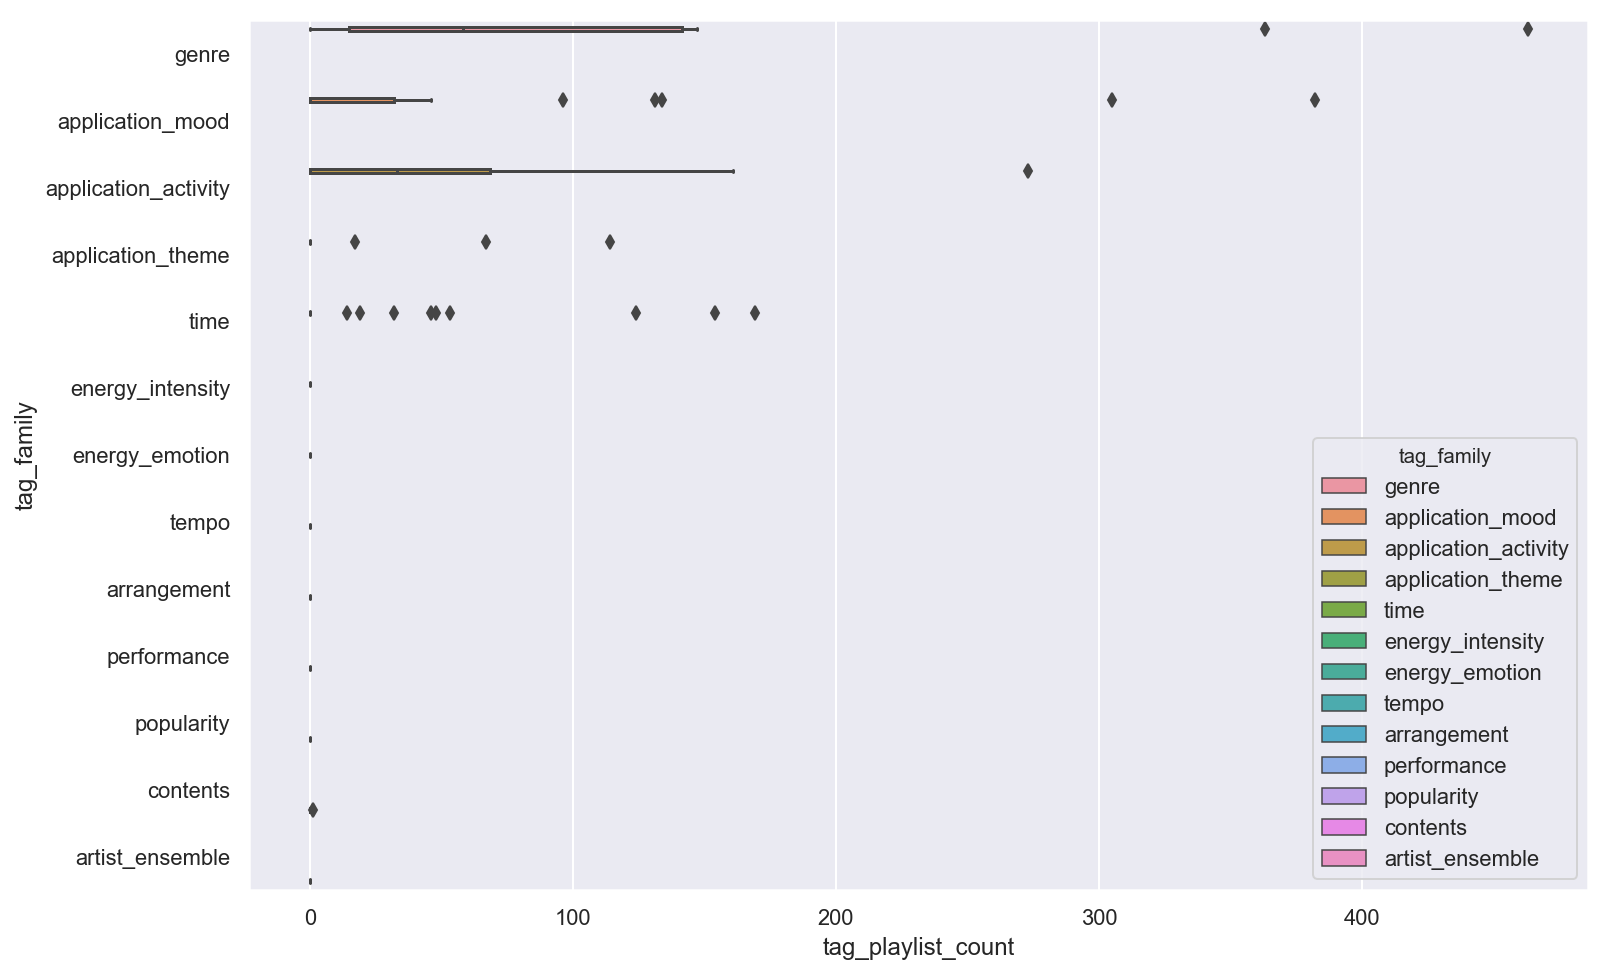

In [26]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()

sns.boxplot(data=tag_coverage, x='tag_playlist_count', y='tag_family', hue='tag_family')

plt.show()

In [27]:
tag_coverage.groupby(by='tag_family').tag_playlist_count.describe()

,count,mean,std,min,25%,50%,75%,max
tag_family,,,,,,,,
application_activity,19.0,49.421053,70.090668,0.0,0.00,33.0,68.50,273.0
application_mood,27.0,42.888889,95.664210,0.0,0.00,0.0,32.00,382.0
application_theme,14.0,14.142857,33.938535,0.0,0.00,0.0,0.00,114.0
arrangement,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
artist_ensemble,4.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
contents,4.0,0.250000,0.500000,0.0,0.00,0.0,0.25,1.0
energy_emotion,34.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
energy_intensity,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
genre,16.0,103.687500,132.205254,0.0,14.75,58.0,141.50,463.0


In [28]:
tag_coverage.groupby(by='tag_family').tag_playlist_count.sum()

tag_family
application_activity     939
application_mood        1158
application_theme        198
arrangement                0
artist_ensemble            0
contents                   1
energy_emotion             0
energy_intensity           0
genre                   1659
performance                0
popularity                 0
tempo                      0
time                     659
Name: tag_playlist_count, dtype: int64

In [29]:
df.sum(axis=1).describe()

count    1441.000000
mean        5.276197
std         3.652822
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        20.000000
dtype: float64

## Building more tags

In [30]:
tags_playlists = gbq.read_gbq('SELECT * FROM `umg-comm-tech-dev.adhoc.amplify_analysis` WHERE tagged_entity_type="StreamingPlaylist"',
    project_id='umg-comm-tech-dev', dialect='standard')
tags_playlists.head()

,tagged_entity_type,playlist_id,isrc,path,value,taxonomy_node_id,source,confidence
0,StreamingPlaylist,3fGdxCiXu9ByRZUA7QeqOD,,Genre/R&B,Funk,8a7b0f84-823d-4905-8471-574de982d71c,Manual,1.0
1,StreamingPlaylist,6IJNg37ejhBbAwfNqe8yme,,Genre/Rock,Punk,a80ba8b4-c477-491b-b1e8-818c7b82efd6,Manual,1.0
2,StreamingPlaylist,0XKz5dOHLZQSHWgkn2jL7Q,,Application/Playlist/Activity,Sleeping,d2cc9a22-907d-4231-a0ea-e80fe515583d,Manual,1.0
3,StreamingPlaylist,0ejM8M3JPmlMK7n5cbg8zl,,Application/Playlist/Activity,Sleeping,d2cc9a22-907d-4231-a0ea-e80fe515583d,Manual,1.0
4,StreamingPlaylist,7iMyUkmPe7epyb8J1mqT9y,,Application/Playlist/Time/Holiday,Christmas,c3de98f1-f82d-4c9f-9d93-e4c1f84a43db,Manual,1.0


### Artist/Ensemble

In [31]:
create_spotify_playlists = """
SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.playlists_create_spotify`
"""

In [32]:
pl_universe = gbq.read_gbq(create_spotify_playlists, project_id='umg-comm-tech-dev', dialect='standard')
pl_universe.head()

,playlist_id,nartists,nalbums,maxpos
0,7jnq1oK7S6Xw4eAlh1NvUn,1,1,10
1,4o78SbI3E5nCs6UmlocRha,95,188,275
2,7vDdx1PnBUanKS2pNUBwoY,2,1,20
3,3EEyQ5PYlEjon7cudhhbBL,1,1,21
4,5qIQS9RpyuESMZBCO9FSqT,1,1,22


In [33]:
pl_universe.shape

(1655, 4)

In [34]:
single_artists = list(set(pl_universe[pl_universe.nartists==1].playlist_id.unique()))

In [35]:
taxonomy_data_playlists.head()

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
0,Genre,Gospel,None,Sung Christian music with roots in traditional...,Classic Gospel,true,9e70e1a7-3e64-4704-9175-f5069732a97a,Genre/Gospel/Classic Gospel
1,Genre,None,None,Characterized by a loose narrative lyrical sty...,Blues,true,e6576040-ba5a-4f51-b547-3d1ec7005afd,Genre/Blues
2,Genre,None,None,Traditional Western art music. Though wide-ran...,Classical,true,9d557d09-c923-410c-b2c9-3239d073d703,Genre/Classical
3,Genre,None,None,Characterized by the use of guitar and twangy ...,Country,true,6dc2a882-8bf6-423e-a9e8-07615ac91154,Genre/Country
4,Genre,None,None,Created primarily by electronic instruments an...,Electronic,true,195e1e65-82e9-4a49-96de-fca22301027e,Genre/Electronic


In [36]:
taxonomy_data_playlists[taxonomy_data_playlists.path=='Artist/Ensemble/Single Artist']

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
52,Artist/Ensemble,None,None,None,Single Artist,true,b6bf1c62-3927-4019-aefd-caa9ca346a47,Artist/Ensemble/Single Artist


In [37]:
taxonomy_data_playlists[taxonomy_data_playlists.path=='Artist/Ensemble/Multiple Artist']

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
51,Artist/Ensemble,None,None,None,Multiple Artist,true,75e6f872-6187-40fa-ac2b-66c2a33eca9f,Artist/Ensemble/Multiple Artist


In [38]:
artist_ensemble_new_tags = pd.DataFrame(columns=tags_playlists.columns)

In [39]:
playlist_id_list = []
tag_id_list = []
tag_value_list = []

for playlist_id in pl_universe.playlist_id:
    playlist_id_list.append(playlist_id)
    if playlist_id in single_artists:
        tag_id_list.append('b6bf1c62-3927-4019-aefd-caa9ca346a47')
        tag_value_list.append('Single Artist')
    else:
        tag_id_list.append('75e6f872-6187-40fa-ac2b-66c2a33eca9f')
        tag_value_list.append('Multiple Artist')
        
artist_ensemble_new_tags['tagged_entity_type']='StreamingPlaylist'
artist_ensemble_new_tags['playlist_id']=playlist_id_list
artist_ensemble_new_tags['isrc']=''
artist_ensemble_new_tags['path']='Artist/Ensemble'
artist_ensemble_new_tags['value']=tag_value_list
artist_ensemble_new_tags['taxonomy_node_id']=tag_id_list
artist_ensemble_new_tags['source']='Auto'
artist_ensemble_new_tags['confidence']=0.9

artist_ensemble_new_tags.head()

,tagged_entity_type,playlist_id,isrc,path,value,taxonomy_node_id,source,confidence
0,NaN,7jnq1oK7S6Xw4eAlh1NvUn,,Artist/Ensemble,Single Artist,b6bf1c62-3927-4019-aefd-caa9ca346a47,Auto,0.9
1,NaN,4o78SbI3E5nCs6UmlocRha,,Artist/Ensemble,Multiple Artist,75e6f872-6187-40fa-ac2b-66c2a33eca9f,Auto,0.9
2,NaN,7vDdx1PnBUanKS2pNUBwoY,,Artist/Ensemble,Multiple Artist,75e6f872-6187-40fa-ac2b-66c2a33eca9f,Auto,0.9
3,NaN,3EEyQ5PYlEjon7cudhhbBL,,Artist/Ensemble,Single Artist,b6bf1c62-3927-4019-aefd-caa9ca346a47,Auto,0.9
4,NaN,5qIQS9RpyuESMZBCO9FSqT,,Artist/Ensemble,Single Artist,b6bf1c62-3927-4019-aefd-caa9ca346a47,Auto,0.9


In [40]:
artist_ensemble_new_tags.shape

(1655, 8)

In [41]:
artist_ensemble_new_tags.value.value_counts()

Multiple Artist    1374
Single Artist       281
Name: value, dtype: int64

In [42]:
artist_ensemble_new_tags.to_gbq('playlist_sequencing.new_tags_artist_ensemble', project_id='umg-comm-tech-dev',
                               if_exists='replace')

1it [00:04,  4.93s/it]


### Contents

In [43]:
taxonomy_data_playlists[(taxonomy_data_playlists.path.str.contains('Contents'))&(taxonomy_data_playlists.taggable!='false')]

,lvl_0,lvl_1,lvl_2,description,name,taggable,taxonomynodeid,path
54,Contents,None,None,None,Artist Specific,true,df690a94-45b6-482c-bdb7-e98718c73dfe,Contents/Artist Specific
55,Contents,None,None,None,Catalog,true,82b7ed8b-a630-4ecd-9b90-3b13de3d1868,Contents/Catalog
56,Contents,None,None,None,Mixed (New/Old),true,d8925492-4438-415f-ac4e-b192a4830e4d,Contents/Mixed (New/Old)
57,Contents,None,None,None,New Music/Frontline,true,096abec2-2f9a-46d5-b395-9222a1856a2c,Contents/New Music/Frontline


In [44]:
get_playlists_track_listings = """
SELECT
  pl.playlist_id,
  MAX(ph.playlist_name) AS playlist_name,
  MAX(ph.playlist_owner) AS playlist_owner,
  MAX(ph.playlist_description) AS playlist_description,
  MIN(ph.follower_count) AS min_follower_count,
  MAX(ph.follower_count) AS max_follower_count,
  pl.maxpos,
  pl.nalbums,
  pl.nartists,
  MIN(th.playlist_date) AS min_track_date,
  MAX(th.playlist_date) AS max_track_date,
  th.isrc,
  MIN(th.track_position) AS min_track_position,
  MAX(th.track_position) AS max_track_position,
  AVG(th.track_position) AS avg_track_position,
  STDDEV(th.track_position) AS std_track_position,
  th.track_artist,
  th.track_title,
  MAX(th.track_add_by) AS track_add_by
FROM
  `umg-comm-tech-dev.playlist_sequencing.playlists_create_spotify` pl
LEFT JOIN
  `umg-edw.spotify.playlist_track_history` th
ON
  pl.playlist_id = th.playlist_id
LEFT JOIN
  `umg-edw.spotify.playlist_history` ph
ON
  pl.playlist_id = ph.playlist_id
WHERE
  th.playlist_date >= "2019-01-01"
  AND th.playlist_date < "2019-07-01"
  AND ph.playlist_date >= "2019-01-01"
  AND ph.playlist_date < "2019-07-01"
GROUP BY
  pl.playlist_id,
  pl.maxpos,
  pl.nalbums,
  pl.nartists,
  th.isrc,
  th.track_artist,
  th.track_title
"""

In [45]:
get_spotify_metadata = """
SELECT
  track_isrc AS isrc,
  t.spotify_track_id,
  t.first_artist_spotify_id AS spotify_artist_id,
  t.duration_ms AS duration_spotify,
  t.popularity AS song_popularity_spotify,
  sa.popularity AS artist_popularity_spotify,
  followers AS artist_followers_spotify,
  genres AS artist_genres_spotify,
  stm.artist_name AS artist_spotify,
  stm.track_name AS title_spotify,
  label AS label_spotify
FROM
  `umg-partner.spotify.spotify_track_metadata` stm
LEFT JOIN
  `umg-alpha.spotify_metadata.tracks` t
ON
  stm.track_isrc = t.isrc
LEFT JOIN
  `umg-alpha.spotify_metadata.spotify_artists` sa
ON
  t.first_artist_spotify_id = sa.spotify_id
WHERE
  track_isrc IN (
  SELECT
    isrc
  FROM
    `umg-comm-tech-dev.playlist_sequencing.playlist_track_listings`
  GROUP BY
    isrc)
"""

In [46]:
get_apple_meta = """
SELECT
  isrc,
  artist_name AS artist_apple,
  title AS title_apple,
  label_studio AS label_apple,
  major_label,
  slw.original_release_date AS release_date,
  earliest_master_track_release_date AS master_track_release_date,
  slw.genre_name AS genre_apple,
  slw.parent_genre_name AS parent_genre_apple,
  p.genre_name AS genre_r2,
  dcm.duration AS duration_apple,
  song_rank AS track_popularity_apple
FROM
  `umg-alpha.epf.song_label_view` slw
LEFT JOIN
  `umg-edw.metadata.mdm_product` p
USING
  (isrc)
LEFT JOIN
  `umg-alpha.epf.song_match`
USING
  (isrc)
LEFT JOIN
  `umg-alpha.epf.song` s
USING
  (song_id)
LEFT JOIN
  `umg-alpha.epf.song_popularity_per_genre` sp
USING
  (song_id)
LEFT JOIN
  `umg-partner.apple_music.daily_content_metadata` dcm
USING
  (isrc)
WHERE
  slw.isrc IN (
  SELECT
    isrc
  FROM
    `umg-comm-tech-dev.playlist_sequencing.playlist_track_listings`
  GROUP BY
    isrc)
"""

In [47]:
get_tracks = """
SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.playlist_track_listings`
"""

In [48]:
tracks = gbq.read_gbq(get_tracks, project_id='umg-comm-tech-dev', dialect='standard')
tracks.head()

,playlist_id,playlist_name,playlist_owner,playlist_description,min_follower_count,max_follower_count,maxpos,nalbums,nartists,min_track_date,max_track_date,isrc,min_track_position,max_track_position,avg_track_position,std_track_position,track_artist,track_title,track_add_by
0,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,spotifycharts,Your daily update of the most played tracks ri...,13402360,13805726,50,296,177,2019-03-30,2019-04-02,USUM71900774,37,48,45.000000,4.640015,Billie Eilish,goodbye,
1,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,spotifycharts,Your daily update of the most played tracks ri...,13402360,13805726,50,296,177,2019-06-30,2019-06-30,USRC11901901,28,28,28.000000,0.000000,Kygo,Higher Love,
2,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,spotifycharts,Your daily update of the most played tracks ri...,13402360,13805726,50,296,177,2019-01-01,2019-02-08,USUM71710087,25,50,41.454545,6.756443,Post Malone,rockstar (feat. 21 Savage),
3,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,spotifycharts,Your daily update of the most played tracks ri...,13402360,13805726,50,296,177,2019-06-08,2019-06-08,ITDF41900026,31,31,31.000000,0.000000,Gemitaiz,Veleno 7,
4,37i9dQZEVXbMDoHDwVN2tF,Global Top 50,spotifycharts,Your daily update of the most played tracks ri...,13402360,13805726,50,296,177,2019-05-25,2019-05-25,SEBGA1902178,44,44,44.000000,0.000000,Kygo,Not Ok,


In [49]:
tracks.shape

(168050, 19)

In [50]:
len(tracks.isrc.unique())

79775

In [51]:
get_meta_apple = """
SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.track_apple_meta`
"""
get_meta_spotify = """
SELECT * FROM `umg-comm-tech-dev.playlist_sequencing.track_spotify_meta`
"""

In [52]:
meta_apple = gbq.read_gbq(get_meta_apple, project_id='umg-comm-tech-dev', dialect='standard')
meta_apple.head()

,isrc,artist_apple,title_apple,label_apple,major_label,release_date,master_release_date,genre_apple,parent_genre_apple,genre_r2,duration_apple,track_popularity_apple
0,USQX91301052,None,None,Sensibility Recordings/Columbia Records,Sony,2013-08-02,NaT,None,None,None,NaN,906.0
1,USSM10018237,None,None,Legacy Recordings,Sony,1994-08-23,NaT,None,None,None,NaN,883.0
2,GB7FT1100003,None,None,Village Green,Other,2012-02-17,NaT,None,None,None,NaN,115.0
3,USSM18300418,None,None,Epic/Legacy,Sony,2006-12-25,1962-01-01,None,None,Rock,NaN,995.0
4,USRE11100709,None,None,143/Reprise,Warner,2011-10-14,NaT,None,None,None,NaN,896.0


In [53]:
meta_apple.shape

(70853, 12)

In [54]:
meta_spotify = gbq.read_gbq(get_meta_spotify, project_id='umg-comm-tech-dev', dialect='standard')
meta_spotify.head()

,isrc,spotify_track_id,spotify_artist_id,duration_spotify,song_popularity_spotify,artist_popularity_spotify,artist_followers_spotify,artist_genres_spotify,artist_spotify,title_spotify,label_spotify
0,DETM41610464,None,None,NaN,NaN,NaN,NaN,None,Eno,Ferrari,Alles Oder Nix Records
1,GBUM71806861,None,None,NaN,NaN,NaN,NaN,None,Catfish and the Bottlemen,2all,Universal-Island Records Ltd.
2,USUM71813869,None,None,NaN,NaN,NaN,NaN,None,Josh Turner,I Saw The Light,MCA Nashville
3,DEUM71806725,None,None,NaN,NaN,NaN,NaN,None,Hainer - Der kleine Hai,Klimawandel-Rap,Karussell
4,QZAPK1800040,None,None,NaN,NaN,NaN,NaN,None,"$uicideBoy$, Travis Barker",Aliens Are Ghosts ($UICIDEBOY$ X TRAVIS BARKER),"G59 Records, LLC"


In [55]:
meta_spotify.shape

(53730, 11)

In [56]:
all_meta = pd.merge(meta_apple,meta_spotify, how='outer', on='isrc')
all_meta.head()

,isrc,artist_apple,title_apple,label_apple,major_label,release_date,master_release_date,genre_apple,parent_genre_apple,genre_r2,...,spotify_track_id,spotify_artist_id,duration_spotify,song_popularity_spotify,artist_popularity_spotify,artist_followers_spotify,artist_genres_spotify,artist_spotify,title_spotify,label_spotify
0,USQX91301052,None,None,Sensibility Recordings/Columbia Records,Sony,2013-08-02,NaT,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USSM10018237,None,None,Legacy Recordings,Sony,1994-08-23,NaT,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GB7FT1100003,None,None,Village Green,Other,2012-02-17,NaT,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USSM18300418,None,None,Epic/Legacy,Sony,2006-12-25,1962-01-01,None,None,Rock,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USRE11100709,None,None,143/Reprise,Warner,2011-10-14,NaT,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
all_meta.shape

(71817, 22)

In [58]:
all_meta.to_gbq(project_id='umg-comm-tech-dev', destination_table='playlist_sequencing.all_tracks_meta',
               if_exists='replace')

1it [00:01,  1.94s/it]
